In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dry = cv2.imread('../Images/Dry03.jpeg')
dry = cv2.cvtColor(dry, cv2.COLOR_BGR2RGB)

wet = cv2.imread('../Images/Wet03.jpeg')
wet = cv2.cvtColor(wet,cv2.COLOR_BGR2RGB)

In [3]:
cv2.imshow("Dry Image", cv2.cvtColor(dry, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
dry_mat = np.array(dry)
wet_mat = np.array(wet)

In [6]:
def extract_color(x):
    x_red = x.copy()
    x_red[:,:,1:3] = 0

    x_green = x.copy()
    x_green[:,:,0:3:2] = 0

    x_blue = x.copy()
    x_blue[:,:,0:2] = 0
    return x_red, x_green, x_blue


In [7]:
# dry_red = dry_mat.copy()
# dry_red[:,:,1:3] = 0

# dry_green = dry_mat.copy()
# dry_green[:,:,0:3:2] = 0

# dry_blue = dry_mat.copy()
# dry_blue[:,:,0:2] = 0

In [ ]:
# wet_red = wet_mat.copy()
# wet_red[:,:,1:3] = 0

# wet_green = wet_mat.copy()
# wet_green[:,:,0:3:2] = 0

# wet_blue = wet_mat.copy()
# wet_blue[:,:,0:2] = 0
    

In [10]:
dry_red, dry_green, dry_blue = extract_color(dry_mat)
wet_red, wet_green, wet_blue = extract_color(wet_mat)

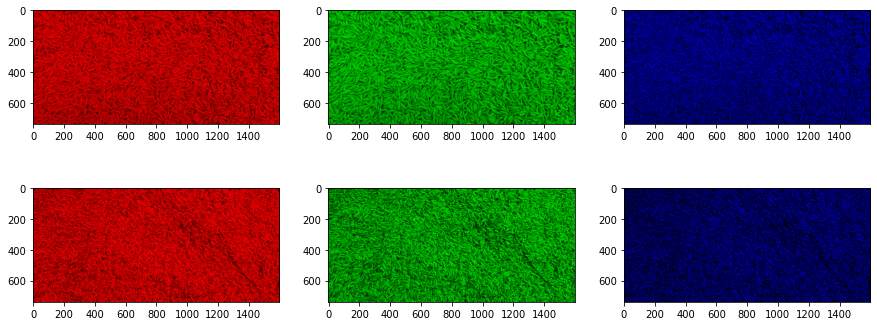

In [11]:
plt.figure(figsize = (15,6))
plt.subplot(231)
plt.imshow(dry_red)
plt.subplot(232)
plt.imshow(dry_green)
plt.subplot(233)
plt.imshow(dry_blue)

plt.subplot(234)
plt.imshow(wet_red)
plt.subplot(235)
plt.imshow(wet_green)
plt.subplot(236)
plt.imshow(wet_blue)

plt.savefig("Extract Color Channel Dry vs Wet.jpg", dpi = 1000)


In [18]:
def get_rgb_dataframe(red, green,blue,row_num):
    df = pd.DataFrame({'Length':np.arange(0,red.shape[1]), 'Red':red[row_num,:,0], 'Green': green[row_num,:,1], "Blue":blue[row_num,:,2]})
    return df

In [12]:
# row_num = 350
# dry_df = pd.DataFrame({'Length':np.arange(0,dry_mat.shape[1]), 'Red':dry_red[row_num,:,0], 'Green': dry_green[row_num,:,1], "Blue":dry_blue[row_num,:,2]})
# wet_df = pd.DataFrame({'Length':np.arange(0,wet_mat.shape[1]), 'Red':wet_red[row_num,:,0], 'Green': wet_green[row_num,:,1], "Blue":wet_blue[row_num,:,2]})

In [22]:
dry_df = get_rgb_dataframe(dry_red,dry_green,dry_blue, row_num)
wet_df = get_rgb_dataframe(wet_red, wet_green, wet_blue, row_num)

## Compare

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(dry_df['Red'],c='r')
plt.plot(wet_df['Red'],c='b')
plt.legend(['Dry','Wet'])

### Using SMA(Simple Moving Average) 

In [23]:
# 250
dry_df['SMA-250'] = dry_df['Blue'].rolling(250, center=True).mean()

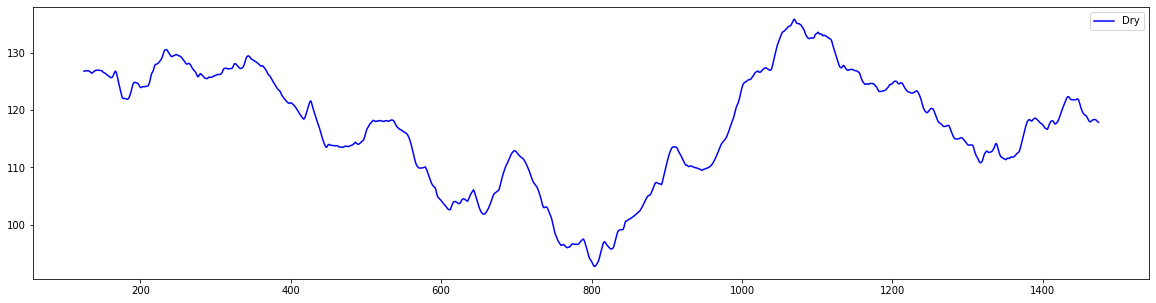

In [24]:
plt.figure(figsize=(20,5))
plt.plot(dry_df['SMA-250'],c='b')
plt.legend(['Dry'])

In [25]:
wet_df['SMA-250'] = wet_df['Blue'].rolling(250, center=True).mean()

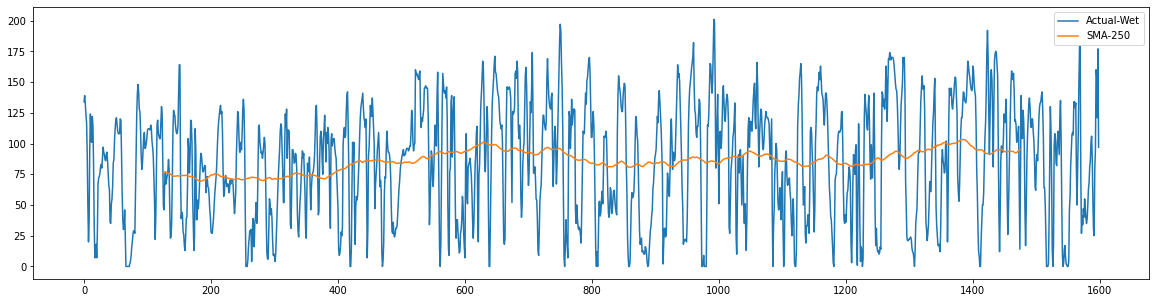

In [26]:
plt.figure(figsize=(20,5))
plt.plot(wet_df['Blue'])
plt.plot(wet_df['SMA-250'])
plt.legend(['Actual-Wet','SMA-250'])
plt.savefig('Wet-blue vs SMA-250.jpg',dpi = 1000)

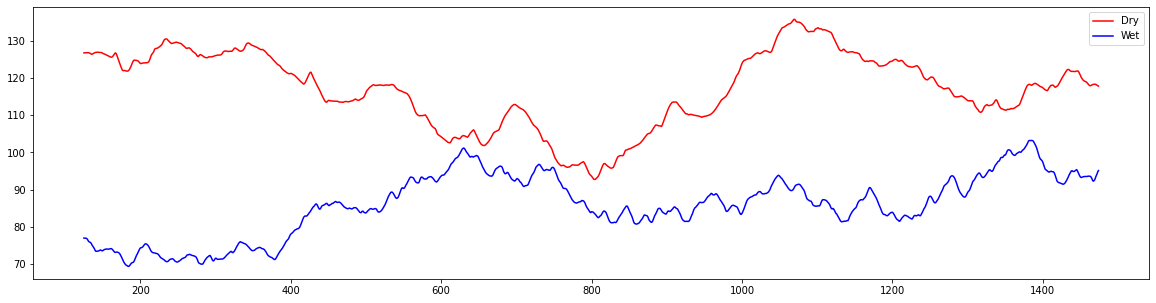

In [27]:
plt.figure(figsize=(20,5))
plt.plot(dry_df['SMA-250'],c='r')
plt.plot(wet_df['SMA-250'],c='b')
plt.legend(['Dry','Wet'])
plt.savefig('Dry Vs Wet SMA-250.jpg',dpi = 1000)

In [29]:
#Using Simple Moving average and plot compareble graph 

def smv_and_plot(df1, df2, color = 'Blue', sam_val = 250):
    column_name =  'SMA-'+str(sam_val)
    df1[column_name] = df1[color].rolling(250, center=True).mean()
    df2[column_name] = df2[color].rolling(250, center = True).mean()
    plt.figure(figsize=(20,5))
    plt.plot(df1[column_name],c='r')
    plt.plot(df1[column_name],c='b')
    plt.legend(['df1','df2'])
    plt.savefig('df1 vs df2',dpi = 1000)
    plt.show()
    

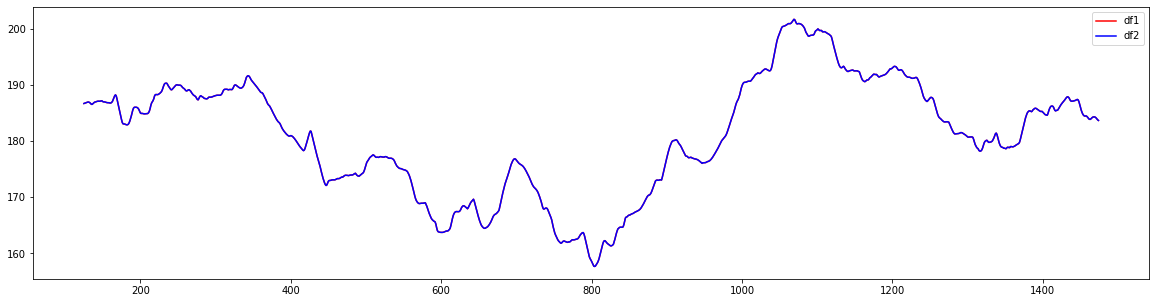

In [30]:
smv_and_plot(df1=dry_df, df2=wet_df, color='Red', sam_val=150)